<a href="https://colab.research.google.com/github/zahidedusgun/BIM535-ML/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("Covid_Dataset_01.csv", sep=",")
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [9]:
data.isnull().sum()
data.corr()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,...,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,NaN,NaN,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,...,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,NaN,NaN,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,...,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,NaN,NaN,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,...,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,NaN,NaN,0.502848
Running 0se,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,...,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,NaN,NaN,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,...,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,NaN,NaN,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,...,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,NaN,NaN,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,...,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,NaN,NaN,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,...,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,NaN,NaN,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,...,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,NaN,NaN,0.040627


In [10]:
data["COVID-19"].value_counts()

,count
COVID-19,
1,4383
0,1051


In [11]:
display(data.corr().style.background_gradient(cmap='coolwarm'))

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Breathing Problem,Fever,Dry Cough,Sore throat,Running 0se,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running 0se,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


<Axes: ylabel='count'>

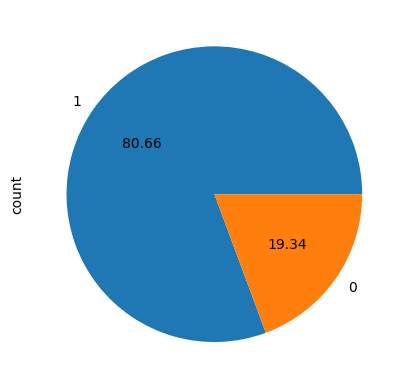

In [12]:
display(data["COVID-19"].value_counts().plot.pie(autopct="%.2f"))


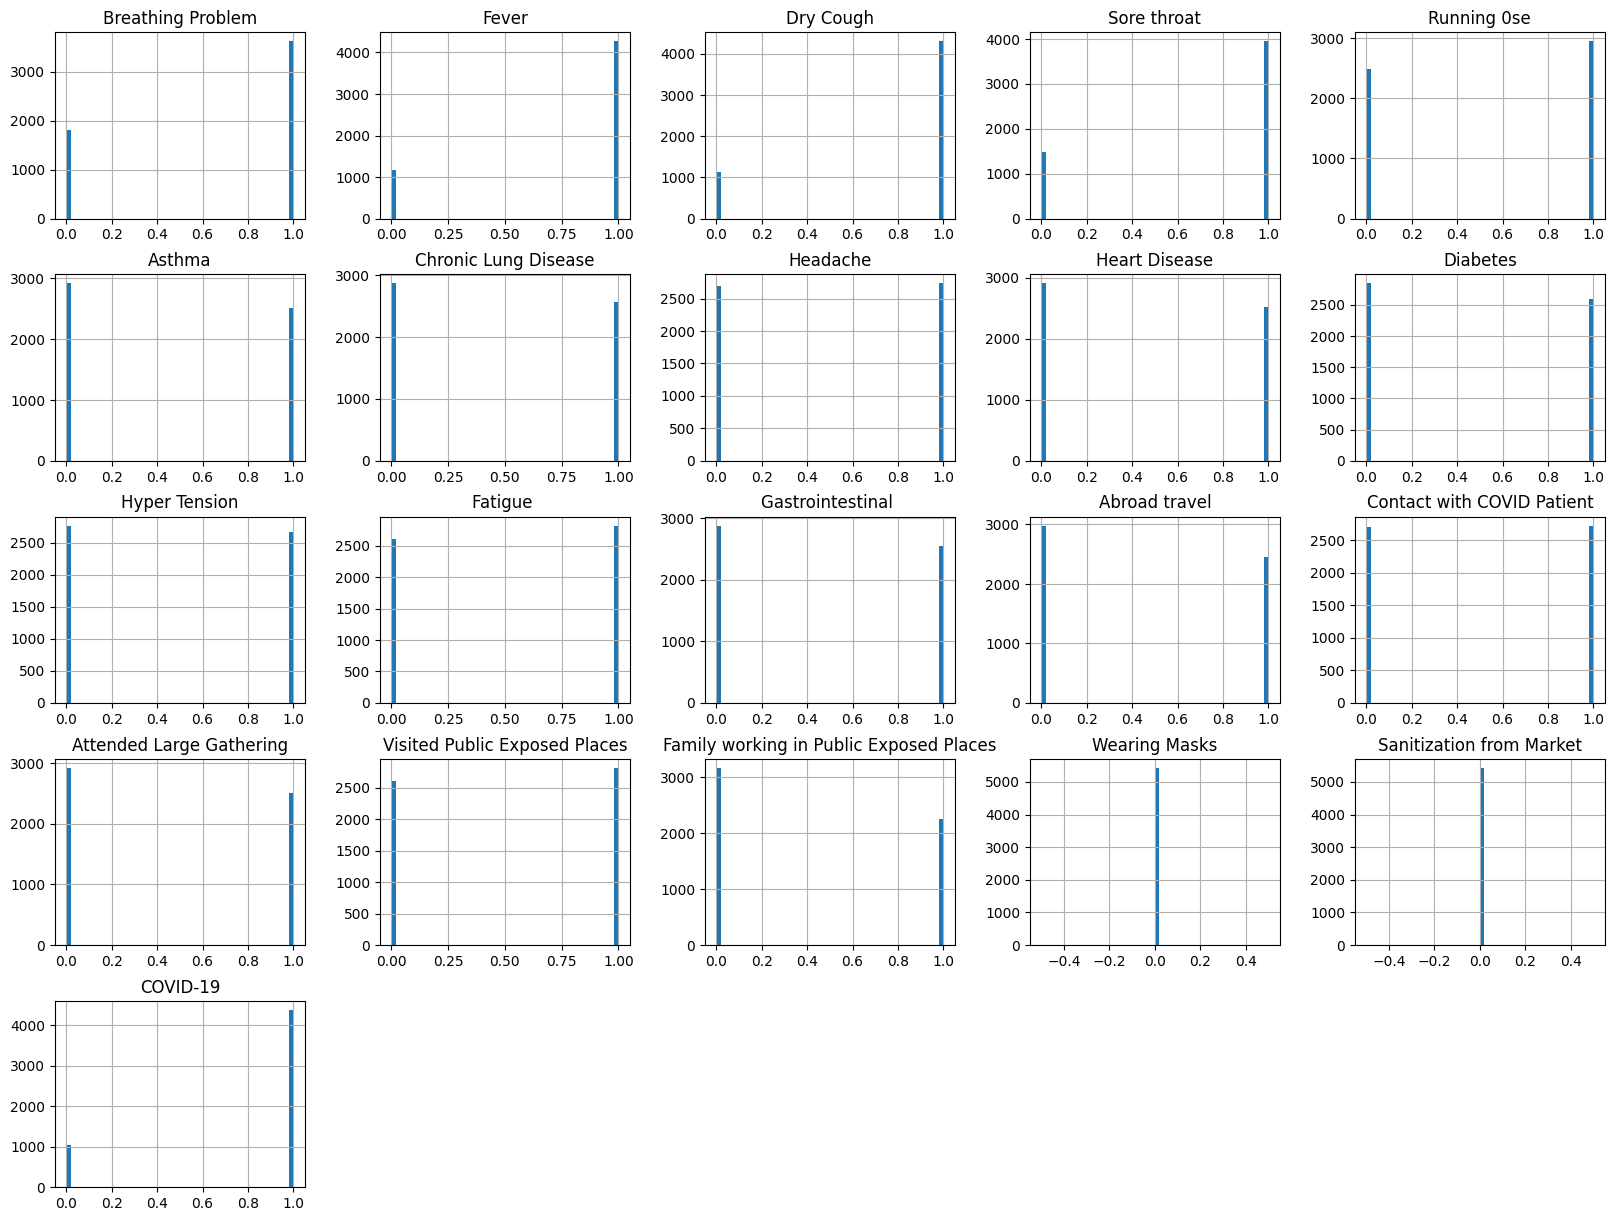

In [13]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
dataset= data.to_numpy()

X = dataset [:,:-1]
Y = dataset [:,-1] #son sütun hariç demek
print(dataset)

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 [1 1 1 ... 0 0 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, p=2)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score: %.2f%%" % (accuracy_score(Y_test, Y_pred) * 100))


Accuracy Score: 97.88%


In [19]:
from inspect import modulesbyfile
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy Score: %.2f%%" % (accuracy_score(Y_test, Y_pred) * 100))

Accuracy Score: 97.88%


In [25]:
Acc = []
for k in range (1,40,2):
  model = KNeighborsClassifier(n_neighbors=k, p=2)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  print("Accuracy Score: %.2f%%" % (accuracy * 100))
  Acc.append(accuracy)

Accuracy Score: 98.07%
Accuracy Score: 98.34%
Accuracy Score: 97.88%
Accuracy Score: 97.88%
Accuracy Score: 97.61%
Accuracy Score: 97.52%
Accuracy Score: 97.33%
Accuracy Score: 96.96%
Accuracy Score: 97.06%
Accuracy Score: 97.06%
Accuracy Score: 96.96%
Accuracy Score: 96.87%
Accuracy Score: 96.60%
Accuracy Score: 96.50%
Accuracy Score: 96.69%
Accuracy Score: 96.50%
Accuracy Score: 96.23%
Accuracy Score: 95.95%
Accuracy Score: 95.86%
Accuracy Score: 95.40%


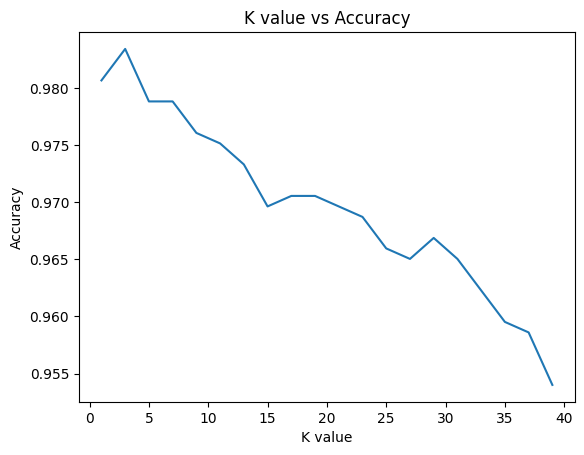

Max Accuracy: 98.3440662373505%
Max K value: 3


In [34]:
plt.plot(range(1,40,2), Acc)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K value vs Accuracy")
plt.show()

print(f"Max Accuracy: {max(Acc)*100}%")
print(f"Max K value: {Acc.index(max(Acc))*2 + 1}")

In [46]:
Error = []
for k in range (1,40,2):
  model = KNeighborsClassifier(n_neighbors=k, p=2)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  err = np.mean(Y_pred != Y_test)
  print("Error: %.2f%%" % (err * 100))
  Error.append(err)

Error: 1.93%
Error: 1.66%
Error: 2.12%
Error: 2.12%
Error: 2.39%
Error: 2.48%
Error: 2.67%
Error: 3.04%
Error: 2.94%
Error: 2.94%
Error: 3.04%
Error: 3.13%
Error: 3.40%
Error: 3.50%
Error: 3.31%
Error: 3.50%
Error: 3.77%
Error: 4.05%
Error: 4.14%
Error: 4.60%


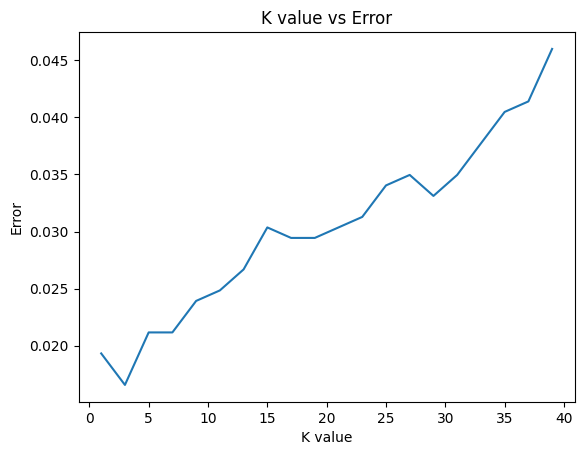

Min Error: 1.6559337626494939%
Min K value: 3


In [47]:
  plt.plot(range(1,40,2), Error)
  plt.xlabel("K value")
  plt.ylabel("Error")
  plt.title("K value vs Error")
  plt.show()

  print(f"Min Error: {min(Error)*100}%")
  print(f"Min K value: {Error.index(min(Error))*2 + 1}")

In [48]:
len(Error)

20